# Harvard's Endowment

## HBS Case
### *The Harvard Management Company and Inflation-Indexed Bonds*


# Section 2: Mean-Variance Optimization (Background Information)


## Data
You will need the file in the github repo, `data/multi_asset_etf_data.xlsx`.
- The time-series data gives monthly returns for the 11 asset classes and a short-term Treasury-bill fund return, ("SHV",) which we consider as the risk-free rate.
- The data is provided in total returns, (in which case you should ignore the SHV column,) as well as excess returns, (where SHV has been subtracted from the other columns.)
- These are nominal returns-they are not adjusted for inflation, and in our calculations we are not making any adjustment for inflation.
- The exhibit data that comes via Harvard with the case is unnecessary for our analysis.


## Model
We are going to analyze the problem in terms of **excess** returns.
- Thus, you will focus on the `Excess Returns` section of the lecture notes, especially the formulas on slide 50.
- Be sure to use the`excess returns` tab of the data.


## Format
In the questions below, **annualize the statistics** you report.
- Annualize the mean of monthly returns with a scaling of 12.
- Annualize the volatility of monthly returns with a scaling of $\sqrt{12}$
- The Sharpe Ratio is the mean return divided by the volatility of returns. Accordingly, we can annualize the Sharpe Ratio with a scaling of $\sqrt{12}$
- Note that we are not scaling the raw timeseries data, just the statistics computed from it (mean, vol, Sharpe).


## Data File
* The case does not give time-series data, so this data has been compiled outside of the case, and it intends to represent the main asset classes under consideration via various ETFs. For details on the specific securities/indexes, check the “Info” tab of the data.


## Risk-free rate
* In the lecture-note we considered a constant risk-free rate. It is okay that our risk-free rate changes over time, but the assumption is that investors know it’s value one-period ahead of time. Thus, at any given point in time, it is a risk-free rate for the next period. (This is often discussed as the "bank account" or "money market account" in other settings.

---

# Section 2: Mean-Variance Optimization (Questions & Solutions)

---

## Question 2.1 - Summary Statistics
Be sure to annualize all three statss (mean, vol, Sharpe).
* mean is scaled by `12`
* vol is scaled by `sqrt(12)`
* Sharpe is scaled by `sqrt(12)`

(a) Calculate and display the mean and volatility of each asset’s excess return. (Recall we use volatility to refer to standard deviation.)

(b) Which assets have the best and worst Sharpe ratios? Recall that the Sharpe Ratio is simply the ratio of the mean-to-volatility of excess returns:
$$\text{sharpe ratio of investment }i = \frac{\mu_i}{\sigma_i}$$

## Question 2.1 (a) Answer

In [224]:
# Question 2.1 (a) Code Here

import pandas as pd
import numpy as np

file_path = "../data/multi_asset_etf_data.xlsx"

# Load the Excel sheet
df = pd.read_excel(file_path, sheet_name="excess returns", index_col=0)

# Drop empty rows/columns
df = df.dropna(how="all", axis=0).dropna(how="all", axis=1)

# Compute monthly stats
mean_monthly = df.mean(numeric_only=True)
vol_monthly  = df.std(numeric_only=True)

# Annualise
mean_annual = mean_monthly * 12
vol_annual  = vol_monthly * np.sqrt(12)

# Create results DataFrame
results = pd.DataFrame({
    "Mean (annualised)": mean_annual,
    "Volatility (annualised)": vol_annual
}).round(4)

# Sort by mean return (highest to lowest)
results_sorted = results.sort_values("Mean (annualised)", ascending=False)

results_sorted



,Mean (annualised),Volatility (annualised)
SPY,0.1281,0.1428
PSP,0.0926,0.2134
IYR,0.0749,0.1687
EFA,0.0618,0.1509
HYG,0.0414,0.0759
EEM,0.0293,0.1762
TIP,0.0205,0.0511
QAI,0.0193,0.0491
IEF,0.0164,0.0634
DBC,-0.0053,0.1666


## Question 2.1 (b) Answer

In [225]:
# Question 2.1 (b) Code Here

# Annualised Sharpe
sharpe_annual = (mean_monthly / vol_monthly) * np.sqrt(12)

# Tidy
sharpe_annual = sharpe_annual.replace([np.inf, -np.inf], np.nan).dropna()

# Add Sharpe to table 
results["Sharpe Ratio (annualised)"] = sharpe_annual
results = results.round(4)

# Order results by Sharpe ratio (best to worst)
results_sorted = results.sort_values("Sharpe Ratio (annualised)", ascending=False)

results_sorted



,Mean (annualised),Volatility (annualised),Sharpe Ratio (annualised)
SPY,0.1281,0.1428,0.8971
HYG,0.0414,0.0759,0.5449
IYR,0.0749,0.1687,0.4441
PSP,0.0926,0.2134,0.4338
EFA,0.0618,0.1509,0.4094
TIP,0.0205,0.0511,0.4011
QAI,0.0193,0.0491,0.3938
IEF,0.0164,0.0634,0.2586
EEM,0.0293,0.1762,0.1665
DBC,-0.0053,0.1666,-0.0318


From the calculated annualised Sharpe ratios, the asset with the best risk-adjusted performance in our sample is SPY, which delivered a Sharpe ratio of 0.897. 

This reflects both strong average excess returns (12.8% annually) and moderate volatility (14.3%). 

At the other end of the spectrum, the asset with the worst risk-adjusted performance is BWX, with a Sharpe ratio of –0.093, driven by negative average returns (–0.8%) despite moderate volatility (8.3%). 

Overall, this ranking highlights that while some assets such as HYG (0.545) and IYR (0.444) also achieved solid risk-adjusted outcomes, SPY stands out as the most attractive investment on a Sharpe basis, whereas BWX was the weakest performer.

---

## Question 2.2 - Descriptive Analysis
(a) Calculate the correlation matrix of the returns. Which pair has the highest correlation? And the lowest?

(b) How well have TIPS done in our sample? Have they outperformed domestic bonds? Foreign bonds?

## Question 2.2 (a) Answer

,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
BWX,1.000,0.191,0.622,0.603,0.603,0.581,0.553,0.527,0.630,0.440,0.675
DBC,0.191,1.000,0.512,0.501,0.462,-0.300,0.281,0.453,0.475,0.432,0.109
EEM,0.622,0.512,1.000,0.820,0.691,0.027,0.584,0.750,0.775,0.688,0.379
EFA,0.603,0.501,0.820,1.000,0.787,0.043,0.699,0.895,0.848,0.846,0.395
HYG,0.603,0.462,0.691,0.787,1.000,0.187,0.739,0.812,0.808,0.794,0.539
IEF,0.581,-0.300,0.027,0.043,0.187,1.000,0.317,0.022,0.180,0.001,0.754
IYR,0.553,0.281,0.584,0.699,0.739,0.317,1.000,0.750,0.719,0.755,0.599
PSP,0.527,0.453,0.750,0.895,0.812,0.022,0.750,1.000,0.873,0.892,0.408
QAI,0.630,0.475,0.775,0.848,0.808,0.180,0.719,0.873,1.000,0.867,0.517
SPY,0.440,0.432,0.688,0.846,0.794,0.001,0.755,0.892,0.867,1.000,0.382



Greatest Positive Correlation: EFA & PSP (0.895)
Greatest Negative Correlation:  DBC & IEF (-0.300)
Least Correlated Pair: IEF & SPY (0.001)


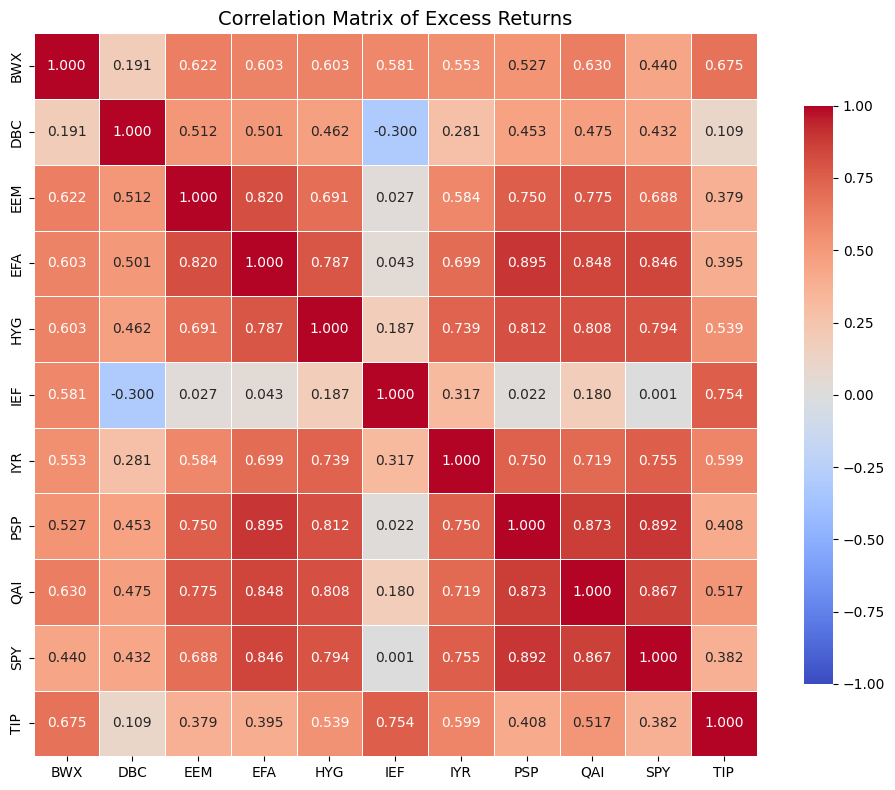

In [ ]:
# Question 2.2 (a) Code Here

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Correlation matrix of monthly excess returns
corr_matrix = df.corr()

# Round for readability
corr_matrix_rounded = corr_matrix.round(3)

# Find highest and lowest correlation
# Stack the matrix into pairs, dropping self-correlations
corr_pairs = corr_matrix.stack().reset_index()
corr_pairs.columns = ["Asset1", "Asset2", "Correlation"]

# Keep only unique pairs
corr_pairs = corr_pairs[corr_pairs["Asset1"] < corr_pairs["Asset2"]]

# Identify max and min correlation pairs
max_corr = corr_pairs.loc[corr_pairs["Correlation"].idxmax()]
min_corr = corr_pairs.loc[corr_pairs["Correlation"].idxmin()]

display(corr_matrix_rounded)
print(f"\nGreatest Positive Correlation: {max_corr['Asset1']} & {max_corr['Asset2']} ({max_corr['Correlation']:.3f})")
print(f"Greatest Negative Correlation:  {min_corr['Asset1']} & {min_corr['Asset2']} ({min_corr['Correlation']:.3f})")

# Find pair with correlation closest to zero
min_abs_corr = corr_pairs.iloc[(corr_pairs['Correlation'].abs()).argmin()]
print(f"Least Correlated Pair: {min_abs_corr['Asset1']} & {min_abs_corr['Asset2']} ({min_abs_corr['Correlation']:.3f})")

# Heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True, fmt=".3f",
    cmap="coolwarm", center=0, vmin=-1, vmax=1,
    square=True, linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    ax=ax
)
ax.set_title("Correlation Matrix of Excess Returns", fontsize=14)
plt.tight_layout()
plt.show()




## Question 2.2 (b) Answer

In our sample, TIPS (TIP) delivered an annualised excess return of roughly 2.1%, with relatively low annualised volatility of about 5.1%. 

This combination translates into a Sharpe ratio near 0.40, signalling that while the raw return is modest, the payoff per unit of risk is favourable compared to several alternatives.

Relative to domestic Treasuries (IEF), TIPS performed better on all fronts: IEF generated an annualised return of about 1.6% with higher volatility of 6.3%, producing a weaker Sharpe ratio of roughly 0.30. 

This means that TIPS not only offered higher average returns but also did so with lower risk, strengthening their appeal in the domestic fixed-income universe.

Relative to high-yield corporate bonds (HYG), TIPS lagged in raw returns (HYG delivered 4.1%) but carried much lower volatility (7.6% for HYG versus 5.1% for TIP). 

Consequently, the Sharpe ratio of HYG (~0.55) edged out that of TIPS, showing that investors in high yield were compensated more per unit of risk, even though the risk profile itself was much higher.

Relative to foreign bonds (BWX), TIPS clearly outperformed. BWX generated negative excess returns (about –0.8%) with volatility over 8.2%, resulting in a negative Sharpe ratio. 

This underscores that TIPS dominated foreign bonds both in raw performance and on a risk-adjusted basis.

---

## Question 2.3 - The MV Frontier
Compute and display the weights of the tangency portfolios: $w_{\tan}$.

(a) Does the ranking of weights align with the ranking of Sharpe ratios?

(b) Compute the mean, volatility, and Sharpe ratio for the tangency portfolio corresponding to
$w_{\tan}$.

## Question 2.3 (a) Answer

In [88]:
# Question 2.3 (a) Code Here
import numpy as np
import pandas as pd
file_path = '../data/multi_asset_etf_data.xlsx'
df = pd.read_excel(file_path, sheet_name="excess returns", index_col="Date")
df = df.drop("QAI", axis=1, errors="ignore") # Drop QAI if present, as the update instruction asks
means = df.mean() 
cov_matrix = df.cov()
freq = 12
mu = means.values * freq
Sigma = cov_matrix.values * freq
ones = np.ones(len(mu))

invSigma = np.linalg.inv(Sigma)
A = ones @ invSigma @ ones
B = ones @ invSigma @ mu
C = mu   @ invSigma @ mu
D = A*C - B**2

# Tangency Portfolio, given rf
def tangency_weights(rf: float = 0.0) -> np.ndarray:
    # w ∝ invSigma @ (mu - rf*1)
    z = invSigma @ (mu - rf*ones)
    return z / (ones @ z)
# Compute Tangency Portfolio
rf = 0.00
w_tan = tangency_weights(rf=rf)

# Print weights ordered from greatest to least
weights_sorted = pd.Series(w_tan, index=df.columns).sort_values(ascending=False)
print(f"\nTangency Portfolio weights (rf={rf*100:.2f}%):\n")
print(weights_sorted)



Tangency Portfolio weights (rf=0.00%):

SPY    1.059632
IEF    0.881186
HYG    0.290614
TIP    0.175293
EFA    0.068682
EEM    0.026437
DBC   -0.071623
IYR   -0.246582
PSP   -0.332995
BWX   -0.850643
dtype: float64


The ranking of weights does not align with the ranking of Sharpe ratios. For example, IEF weights second, but ranks 7th of Sharpe ratios.

## Question 2.3 (b) Answer

In [89]:
# Question 2.3 (b) Code Here
r_tan = w_tan @ mu
s_tan = np.sqrt(w_tan @ Sigma @ w_tan)
print(f"Tangency Portfolio: mean return = {r_tan:.4f}, volatility = {s_tan:.4f}, Sharpe Ratio = {(r_tan-rf)/s_tan:.4f}")

Tangency Portfolio: mean return = 0.1285, volatility = 0.0875, Sharpe Ratio = 1.4692


---

## Question 2.4: TIPS
Assess how much the tangency portfolio (and performance) change if...

(a) TIPS are dropped completely from the investment set.

(b) The expected excess return to TIPS is adjusted to be 0.0012 higher than what the historic sample shows.

Based on the analysis, do TIPS seem to expand the investment opportunity set, implying that Harvard should consider them as a separate asset?

## Question 2.4 (a) Answer

In [229]:
# Question 2.4 (a) Code Here

## Question 2.4 (b) Answer

In [230]:
# Question 2.4 (b) Code Here


***

# Section 3: Allocations (Background Information)


* Continue with the same data file as the previous section.

* Suppose the investor has a targeted mean excess return (per month) of $\tilde{\mu}_{\text{port}}
$ = 0.01.

---

# Section 3: Allocations (Questions & Solutions)


Build the following portfolios:

---

## Question 3.1 - Equally-weighted (EW)
Rescale the entire weighting vector to have target mean $\tilde{\mu}_{\text{port}}
$. 

Thus, the $i$ element of the weight vector is,

$\mathbf{w}_i^{\mathrm{EW}} = \frac{1}{n}$

In [231]:
# Question 3.1 Code Here
# Equally-weighted portfolio
w_ew=w_tan.copy()
w_ew[:]=1/len(w_tan)
print(f"\nEqually-weighted Portfolio weights (rf={rf*100:.2f}%):\n", pd.Series(w_ew, index=df.columns))


Equally-weighted Portfolio weights (rf=0.00%):
 BWX    0.1
DBC    0.1
EEM    0.1
EFA    0.1
HYG    0.1
IEF    0.1
IYR    0.1
PSP    0.1
SPY    0.1
TIP    0.1
dtype: float64


---

## Question 3.2 - “Risk-parity” (RP)
Risk-parity is a term used in a variety of ways, but here we have in mind setting the weight of the portfolio to be proportional to the inverse of its full-sample variance estimate. Thus, the $i$ element of the weight vector is,

$$\mathbf{w}_i^{\mathrm{RP}} = \frac{1}{\sigma_i^2}$$

In [91]:
# Question 3.2 Here 

# Calculating volatily
sig2 = np.diag(Sigma)

# Risk-parity portfolio
w_rp=w_tan.copy()
w_rp=1/(sig2)
w_rp=w_rp/w_rp.sum()

# Convert to Series and sort descending
weights_rp_sorted = pd.Series(w_rp, index=df.columns).sort_values(ascending=False)

print(f"\nRisk-parity Portfolio weights (rf={rf*100:.2f}%):\n")
print(weights_rp_sorted)


Risk-parity Portfolio weights (rf=0.00%):

TIP    0.327442
IEF    0.212563
HYG    0.148400
BWX    0.124822
SPY    0.041932
EFA    0.037570
DBC    0.030841
IYR    0.030070
EEM    0.027568
PSP    0.018792
dtype: float64


---

## Question 3.3 - Mean-Variance (MV)
As described in `Section 2`.

In [92]:
# Convert to Series and sort descending
weights_tan_sorted = pd.Series(w_tan, index=df.columns).sort_values(ascending=False)

print(f"\nTangency Portfolio weights (rf={rf*100:.2f}%):\n")
print(weights_tan_sorted)


Tangency Portfolio weights (rf=0.00%):

SPY    1.059632
IEF    0.881186
HYG    0.290614
TIP    0.175293
EFA    0.068682
EEM    0.026437
DBC   -0.071623
IYR   -0.246582
PSP   -0.332995
BWX   -0.850643
dtype: float64


---

## Question 3.4 - Comparing

In order to compare all these allocation methods, rescale each weight vector, such that it has targeted mean return of $\tilde{\mu}_{\text{port}}
$.

(a) Calculate the performance of each of these portfolios over the sample.

(b) Report their mean, volatility, and Sharpe ratio. 

(c) How does performance compare across allocation methods?

## Question 3.4 (a) Answer

In [234]:
# Question 3.4 (a) Code Here 
#u-portfolio with 1% target montly return = 12% annual return
mu_target=0.01*12

#scaling weights of portfolios  with cash to reach target return
def scale_weights(w: np.ndarray) -> tuple[np.ndarray, float]:
    mu_p= w @ mu #expected return of portfolio
    k = mu_target/mu_p #scaling factor
    w_star = k*w #scaled weights of portfolio
    w_cash = 1 -w_star.sum() #weight of cash
    return w_star, w_cash

#weights of portfolios and cash
w_ew_star, cash_ew = scale_weights(w_ew)
w_rp_star, cash_rp = scale_weights(w_rp)
w_tan_star, cash_tan = scale_weights(w_tan)

#printing
def print_portfolio(name: str, w_star: np.ndarray, w_cash: float) -> None:
    print(f"\n{name}")
    print(f"Risky-asset weights: {np.round(w_star, 3)}")
    print(f"Cash weight:         {w_cash:.4f}")
    print(f"Sum (portfolio+cash):    {(w_star.sum() + w_cash):.4f}")

print_portfolio("Equally-weighted (targeted)", w_ew_star,  cash_ew)
print_portfolio("Risk-parity (targeted)", w_rp_star, cash_rp)
print_portfolio("Tangency (targeted)", w_tan_star, cash_tan)


Equally-weighted (targeted)
Risky-asset weights: [0.265 0.265 0.265 0.265 0.265 0.265 0.265 0.265 0.265 0.265]
Cash weight:         -1.6549
Sum (portfolio+cash):    1.0000

Risk-parity (targeted)
Risky-asset weights: [0.541 0.134 0.119 0.163 0.643 0.921 0.13  0.081 0.182 1.418]
Cash weight:         -3.3308
Sum (portfolio+cash):    1.0000

Tangency (targeted)
Risky-asset weights: [-0.794 -0.067  0.025  0.064  0.271  0.823 -0.23  -0.311  0.989  0.164]
Cash weight:         0.0663
Sum (portfolio+cash):    1.0000


## Question 3.4 (b) Answer

In [235]:
# Question 3.4 (b) Code Here
#calculating metric sof portfolios with cash
def portfolio_metrics(w_star: np.ndarray, w_cash: float) -> tuple[float, float, float]:
    r =float(w_star @ mu + w_cash*rf)
    vol=float(np.sqrt(w_star @ Sigma @ w_star))
    sharpe=(r-rf)/vol
    return r, vol, sharpe

r_ew, vol_ew, sharpe_ew = portfolio_metrics(w_ew_star, cash_ew)
r_rp, vol_rp, sharpe_rp = portfolio_metrics(w_rp_star, cash_rp)
r_tan, vol_tan, sharpe_tan = portfolio_metrics(w_tan_star, cash_tan)


#printing
def print_metrics(name: str, r: float, vol: float, sharpe: float) -> None:
    print(f"\n{name}")
    print(f"Mean return: {np.round(r, 3)}")
    print(f"Volatility: {vol:.4f}")
    print(f"Sharpe ratio: {sharpe:.4f}")

print_metrics("Equally-weighted (targeted)", r_ew,  vol_ew, sharpe_ew)
print_metrics("Risk-parity (targeted)", r_rp, vol_rp, sharpe_rp)
print_metrics("Tangency (targeted)", r_tan, vol_tan, sharpe_tan)


Equally-weighted (targeted)
Mean return: 0.12
Volatility: 0.2692
Sharpe ratio: 0.4457

Risk-parity (targeted)
Mean return: 0.12
Volatility: 0.2639
Sharpe ratio: 0.4547

Tangency (targeted)
Mean return: 0.12
Volatility: 0.0817
Sharpe ratio: 1.4692


## Question 3.4 (c) Answer

With the return at the target we can see that the tangency portfolio performs much better than the rest. It reaches the target with the lowest volatility and a Sharpe ratio around 1.47.

By contrast, the risk-parity portfolio and the equally-weighted portfolio required about three times more volatiltiy to attain the same returns. Both have Sharpe ratios near 0.45. 

The risk-parity portfolio does slightly better than equally-weighted one given that its volatility is a bit lower and its Sharpe ratio a touch higher.